In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
'''
import cv2
import os

import numpy as np

## Preprocessing and Visualisation

In [3]:
df = pd.read_csv("clean-dirty-metadata.csv",sep=';')
df = df.drop(['source','x_lat','y_lon','annotation_path'],axis=1)
df["label"] = (df["label"] == "clean").astype(int)
df

,image_path,split,label
0,clean-dirty-garbage-containers/train/clean/001...,train,1
1,clean-dirty-garbage-containers/train/clean/001...,train,1
2,clean-dirty-garbage-containers/train/clean/001...,train,1
3,clean-dirty-garbage-containers/train/clean/001...,train,1
4,clean-dirty-garbage-containers/train/clean/001...,train,1
...,...,...,...
3407,clean-dirty-garbage-containers/test/dirty/e8e1...,test,0
3408,clean-dirty-garbage-containers/test/dirty/f02b...,test,0
3409,clean-dirty-garbage-containers/test/dirty/f29b...,test,0
3410,clean-dirty-garbage-containers/test/dirty/fc02...,test,0


In [4]:
import os
df['jpg']=''
for i in range(0,len(df)):
    path = df.image_path[i]
    df['jpg'][i] = os.path.basename(path)
df

<ipython-input-4-93fd5690ba75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jpg'][i] = os.path.basename(path)


,image_path,split,label,jpg
0,clean-dirty-garbage-containers/train/clean/001...,train,1,00111_05.jpg
1,clean-dirty-garbage-containers/train/clean/001...,train,1,00121_01.jpg
2,clean-dirty-garbage-containers/train/clean/001...,train,1,00122_04.jpg
3,clean-dirty-garbage-containers/train/clean/001...,train,1,00124_02.jpg
4,clean-dirty-garbage-containers/train/clean/001...,train,1,00131_01.jpg
...,...,...,...,...
3407,clean-dirty-garbage-containers/test/dirty/e8e1...,test,0,e8e1d8c9b1181d47b72c23e4afad5919a4b88518.temp....
3408,clean-dirty-garbage-containers/test/dirty/f02b...,test,0,f02bbb99dd4487416f2a807f5e4ddc8fda2fcc98.temp....
3409,clean-dirty-garbage-containers/test/dirty/f29b...,test,0,f29baaa55acaaac374ca9d24fcf13702852e1376.temp....
3410,clean-dirty-garbage-containers/test/dirty/fc02...,test,0,fc026b24f61b2165d89b588538270940d3dc700b.temp....


In [5]:
df["images"]=""
for i in range(len(df["image_path"])) :
    img = cv2.imread(df["image_path"][i].partition("/")[2])
    df["images"][i]=img

<ipython-input-5-13774959df45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["images"][i]=img


In [6]:
df_train = df[df.split == 'train']
df_test = df[df.split == 'test']
df_train

,image_path,split,label,jpg,images
0,clean-dirty-garbage-containers/train/clean/001...,train,1,00111_05.jpg,"[[[17, 18, 16], [17, 18, 16], [13, 15, 15], [1..."
1,clean-dirty-garbage-containers/train/clean/001...,train,1,00121_01.jpg,"[[[186, 167, 164], [112, 93, 90], [104, 85, 80..."
2,clean-dirty-garbage-containers/train/clean/001...,train,1,00122_04.jpg,"[[[182, 183, 174], [180, 181, 172], [178, 179,..."
3,clean-dirty-garbage-containers/train/clean/001...,train,1,00124_02.jpg,"[[[198, 192, 187], [198, 192, 187], [198, 192,..."
4,clean-dirty-garbage-containers/train/clean/001...,train,1,00131_01.jpg,"[[[210, 208, 208], [210, 208, 208], [210, 208,..."
...,...,...,...,...,...
2212,clean-dirty-garbage-containers/train/dirty/qwe...,train,0,qweqw.jpg,"[[[107, 116, 143], [63, 72, 99], [39, 48, 75],..."
2213,clean-dirty-garbage-containers/train/dirty/qwe...,train,0,qwerqw.jpeg,"[[[96, 86, 86], [96, 86, 86], [96, 86, 86], [9..."
2214,clean-dirty-garbage-containers/train/dirty/sdf...,train,0,sdfsdfgdfg.jpeg,"[[[37, 76, 68], [53, 92, 84], [66, 107, 99], [..."
2215,clean-dirty-garbage-containers/train/dirty/tra...,train,0,tras-los-festejos-de-ano-nuevo-v-1024x576.jpg,"[[[170, 149, 118], [170, 149, 118], [170, 149,..."


/Users/haliouanaomie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

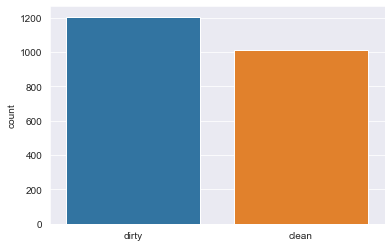

In [7]:
l = []
for i in df_train.label:
    if(i == 0):
        l.append("clean")
    else:
        l.append("dirty")
sns.set_style('darkgrid')
sns.countplot(l)
#balance dataset

In [8]:
x_train = df_train.images
y_train = df_train.label

x_test = df_test.images
y_test = df_test.label

In [ ]:
#récupère 50 dirty et 50 clean pour créer une nouvelle liste
nb = 50
x_temp = x_train[list(y_train[y_train==0].index[:nb]) + list(y_train[y_train==1].index[:nb])]
y_temp = y_train[list(y_train[y_train==0].index[:nb]) + list(y_train[y_train==1].index[:nb])]

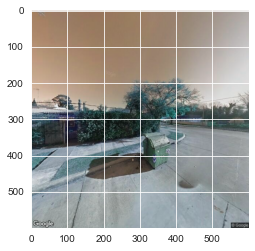

In [9]:
img = cv2.imread(df["image_path"][100].partition("/")[2])
plt.imshow(img)

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (x_train.min(), x_train.max()))